### Classification techniques

Refer to description for understanding the dataset.
The answer we are trying to find is the age which is rings+1.5. so, after forming a new column 'age' from the 'rings' column, four classification algorithms were used to predict the target feature.

In the process of developing machine learning models, cross validation is a crucial phase that makes sure we do not overfit and that our model fits the data appropriately. When utilising cross validation, we don't need to call the fit method separately; instead, we may use the cross_val_score method, which automatically fits the data as we apply cross-validation to it. We separate the data into k distinct sets that are mutually exclusive. In our case, we divided it into 5 folds. This method works with practically all dataset types.

The sample sizes for each category clearly alter when the multiclass problem is reduced to a number of one-versus-all binary classifications. In modelling objective function, it introduces a significant level of bias. In the case of this dataset, this scenario happened as it is a multi-class set and this could only be inferred after running the models.

The k-Nearest-Neighbors technique of classification simply involves locating the training data points that are the most similar to each other and estimating the classes of those points. Based on the below analysis, Naive Bayes model has the best accuracy among all classification models. However, it’s not significant higher than other models. Further analysis is needed due to the limitation.

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Setup

In [3]:
#loading the 'Abalone' dataset from UCI repository
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

#glimpse of data
print(abalone)

###Observation:
#we can observe that the data doesn't have any column labels, we can get them from the documentation.
abalone.columns = ["sex", "length", "diameter", "height", "whole weight", "shucked weight", "viscera weight", "shell weight", "rings"]

#glimpse of data after adding column names
print(abalone)

#shape of our dataset
print(abalone.shape)

#checking for null values
print(abalone.isna().sum()) #as given in description, there are no missing values in this dataset

#basic statistics of data
print("Basic statistics of the Abalone dataset: \n")
print(abalone.describe())

###Observation:
#We could see that the height column has some values which are zero (from min. row of the describe method).
print("Basic statistics of the height attribute: \n")
print(abalone.height.describe())
#checking how many columns have height as zero as it is impractical
print(abalone[abalone['height'] == 0])
###Observation:
#We could see only two rows have height as zero, so removing these columns.
abalone = abalone[abalone.height != 0]

#latest shape of the dataset
print(abalone.shape)

#checking dataset info
print(abalone.info())

      0      1      2      3       4       5       6       7   8
0     M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.1500  15
1     M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.0700   7
2     F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.2100   9
3     M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.1550  10
4     I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.0550   7
...  ..    ...    ...    ...     ...     ...     ...     ...  ..
4172  F  0.565  0.450  0.165  0.8870  0.3700  0.2390  0.2490  11
4173  M  0.590  0.440  0.135  0.9660  0.4390  0.2145  0.2605  10
4174  M  0.600  0.475  0.205  1.1760  0.5255  0.2875  0.3080   9
4175  F  0.625  0.485  0.150  1.0945  0.5310  0.2610  0.2960  10
4176  M  0.710  0.555  0.195  1.9485  0.9455  0.3765  0.4950  12

[4177 rows x 9 columns]
     sex  length  diameter  height  whole weight  shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0

## Pre-processing and Visualization 

### Histogram - for target variable 'rings'

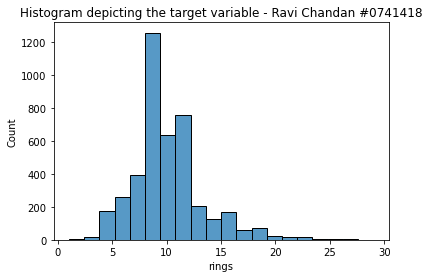

In [5]:
sns.histplot(data=abalone,x='rings',bins=20).set(title='Histogram depicting the target variable - Ravi Chandan #0741418')
plt.show()

### Observations:

Most abalones in the dataset have between five and fifteen rings

Older-aged abalones are under-represented in this dataset, which is natural

20 bins have been used on an experimental basis to have the best view

In [7]:
#From the problem statement, rings+1.5 gives the age in years
#so we can create a new column 'age' with the help of 'rings'
abalone['age'] = abalone['rings'] + 1.5

### Heat Map - plotting correlation of the numerical features

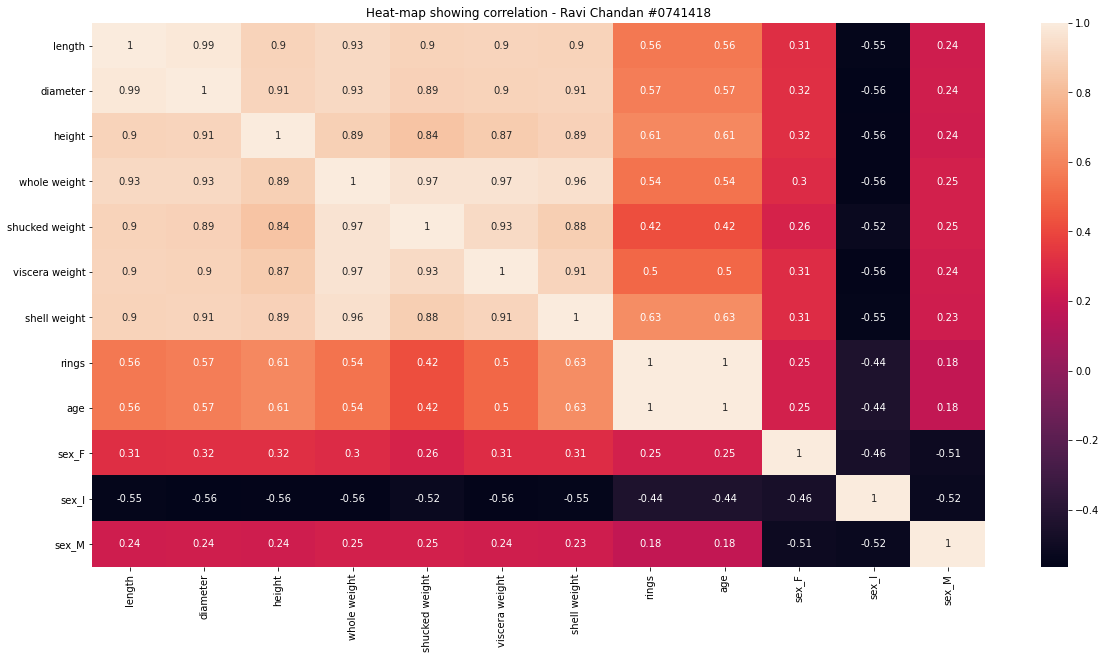

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(abalone.corr(), annot=True).set(title='Heat-map showing correlation - Ravi Chandan #0741418')
plt.show()

### Observations:

-many features are highly correlated

-length and diamter are linearly correlated

-whole weight is also linearly correalted with other weight attributes

-some correlation with physical attributes and age of adult abalones

-age is highly correlated with shell weight followed by weight

-possible outliers in 'height' attribute

### Box plot - to check outliers in the data

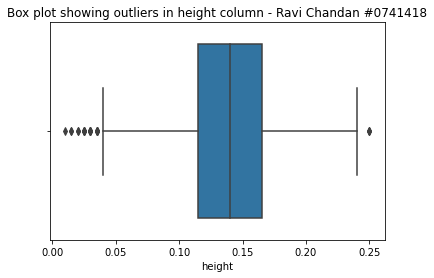

In [12]:
sns.boxplot(x=abalone['height']).set(title='Box plot showing outliers in height column - Ravi Chandan #0741418')
plt.show()

### Scatter plot depicting the outliers in height column

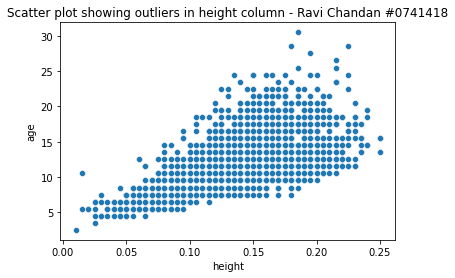

In [14]:
sns.scatterplot(x=abalone["height"],y=abalone["age"]).set(title='Scatter plot showing outliers in height column - Ravi Chandan #0741418')
plt.show()

In [15]:
#removing outliers from height data
abalone.drop(abalone[abalone['height'] > 0.3].index,inplace = True)

In [16]:
###Observation:
#sex is a categorical attribute in the dataset, should be converted to continous variable
#hot coding the sex attribute
abalone = pd.get_dummies(abalone)
print(abalone.head())

   length  diameter  height  whole weight  shucked weight  viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell weight  rings   age  sex_F  sex_I  sex_M  
0         0.150     15  16.5      0      0      1  
1         0.070      7   8.5      0      0      1  
2         0.210      9  10.5      1      0      0  
3         0.155     10  11.5      0      0      1  
4         0.055      7   8.5      0      1      0  


### Pre-processing before application of Classification techniques

In [17]:
#Classification

# Attribute and target split
X = abalone.drop(['rings'], axis=1).values
y = abalone[['rings']].values.ravel()

#Data Standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Cross-validation - Using K-Fold cross-validation technique
cv = KFold(n_splits=5)

### Classifier 1 - Decision Tree Classifier

In [28]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dt_scores = cross_val_score(dt, X, y, cv=cv)
print("Cross validation scores of Decision Tree Classifier: \n", dt_scores)
print(dt_scores)
dt_y = cross_val_predict(dt, X, y, cv=cv)
# print("Confusion matrix of Decision Tree Classifier: \n", confusion_matrix(y, dt_y))

Cross validation scores of Decision Tree Classifier: 
 [0.79281437 0.97844311 0.9005988  0.93645084 0.94724221]
[0.79281437 0.97844311 0.9005988  0.93645084 0.94724221]


### Classifier 2 - KNN Classifier

In [27]:
k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn_scores = cross_val_score(knn, X, y, cv=cv)
print("Cross validation scores of K-Nearest Neighbors Classifier: \n", knn_scores)
print(knn_scores)
knn_y = cross_val_predict(knn, X, y, cv=cv)
# print("Confusion matrix of K-Nearest Neighbors Classifier: \n", confusion_matrix(y, knn_y))

Cross validation scores of K-Nearest Neighbors Classifier: 
 [0.49700599 0.78443114 0.64790419 0.73141487 0.74820144]
[0.49700599 0.78443114 0.64790419 0.73141487 0.74820144]


### Classifier 3 - Random Forest Classifier

In [26]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=4)
rfc_scores = cross_val_score(rfc, X, y, cv=cv)
print("Cross validation scores of Random Forest Classifier: \n", rfc_scores)
print(rfc_scores)
rfc_y = cross_val_predict(rfc, X, y, cv=cv)
# print("Confusion matrix of Random Forest Classifier: \n", confusion_matrix(y, rfc_y))

Cross validation scores of Random Forest Classifier: 
 [0.48622754 0.82994012 0.62994012 0.74100719 0.77458034]
[0.48622754 0.82994012 0.62994012 0.74100719 0.77458034]


### Classifier 4- Naive Bayes Classifier

In [23]:
gnb = GaussianNB()
gnb_scores = cross_val_score(gnb, X, y, cv=cv)
print("Cross validation scores of Naive Bayes Classifier: \n", gnb_scores)
print(gnb_scores)
gnb_y = cross_val_predict(gnb, X, y, cv=cv)
# print("Confusion matrix of Naive Bayes Classifier: \n", confusion_matrix(y, gnb_y))

Cross validation scores of Naive Bayes Classifier: 
 [0.98083832 1.         0.99640719 0.99760192 1.        ]
[0.98083832 1.         0.99640719 0.99760192 1.        ]
